In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #lo
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
height_data = pd.read_csv('/content/height-weight.csv')

In [3]:
height_data.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
height_data.shape

(23, 2)

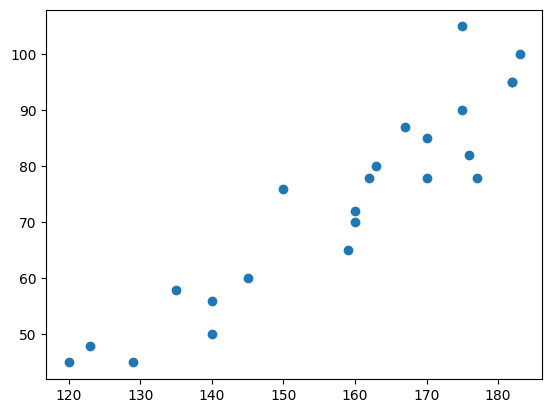

In [5]:
plt.scatter(height_data['Height'], height_data['Weight'])
# plt.xlabel('Height')
# plt.ylabel('Weight')
# plt.title('Height vs Weight')
# plt.show()
# /this is a linear realtion as the height increases the weight is also increasing

In [6]:
# find the correlation
height_data.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [7]:
# divide the data into train and testing data
X = height_data.drop(columns='Weight', axis=1)
Y = height_data['Weight']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
y_train

12    105
1      58
13    100
5      78
2      48
11     95
20     45
3      60
4      70
18     76
16     50
21     56
22     72
7      90
10     82
14     85
19     87
6      80
Name: Weight, dtype: int64

In [10]:
# standardize the data with data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [18]:
std_xtrain = scaler.fit_transform(x_train)
std_xtest = scaler.transform(x_test)

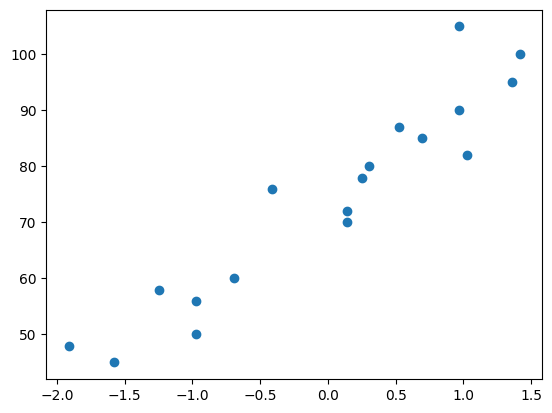

In [19]:
plt.scatter(std_xtrain,y_train)

In [20]:
regression = LinearRegression()

In [22]:
regression.fit(std_xtrain, y_train)

LinearRegression()

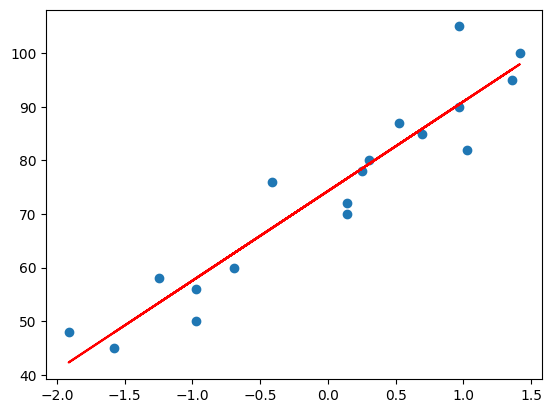

In [23]:
plt.scatter(std_xtrain, y_train)
plt.plot(std_xtrain, regression.predict(std_xtrain), color='red')
plt.show()

In [25]:
X_train=np.array(std_xtrain).reshape(-1,1)
X_test=np.array(x_test).reshape(-1,1)

In [27]:
regression.fit(X_train,y_train)

LinearRegression()

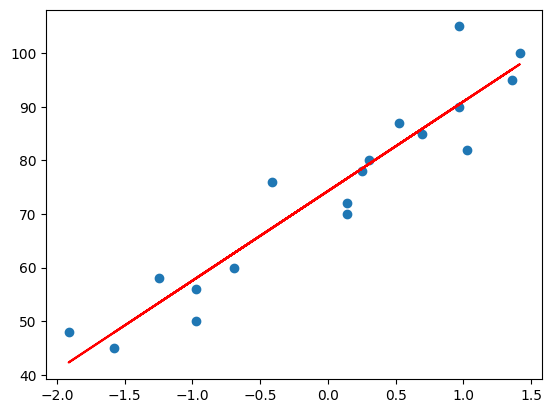

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color='red')
plt.show()

In [30]:
print(regression.score(X_train,y_train))

0.8930630841011483


In [33]:
print(regression.coef_,regression.intercept_)

[16.71556824] 74.27777777777777


In [34]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_test)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.048
Model:                            OLS   Adj. R-squared (uncentered):             -0.008
Method:                 Least Squares   F-statistic:                             0.8558
Date:                Mon, 17 Jun 2024   Prob (F-statistic):                       0.368
Time:                        06:50:26   Log-Likelihood:                         -103.14
No. Observations:                  18   AIC:                                      208.3
Df Residuals:                      17   BIC:                                      209.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
